Model Building

In [1]:
import os
import pickle
import cv2
import numpy as np
import pandas as pd


In [2]:
#Loading data that saved from data preparation
data=np.load('./data.npy')
target=np.load('./target.npy')
data.shape[1:]

(50, 50, 1)

In [3]:
target.shape

(10509, 4)

In [4]:
data[1:]

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.34117647],
         [0.34117647],
         [0.34117647],
         ...,
         [0.34117647],
         [0.34117647],
         [0.34117647]],

        [[0.37254902],
         [0.40392157],
         [0.40392157],
         ...,
         [0.40392157],
         [0.40392157],
         [0.37647059]],

        [[0.40392157],
         [0.40392157],
         [0.40392157],
         ...,
         [0.40392157],
         [0.40392157],
         [0.40392157]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [5]:
#Building the CNN Model
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D, Dropout

model=Sequential()


model.add(Conv2D(510,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(target.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 510)       5100      
                                                                 
 activation (Activation)     (None, 48, 48, 510)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 510)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       1175296   
                                                                 
 activation_1 (Activation)   (None, 22, 22, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 256)       0         
 g2D)                                                   

In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [7]:
#fitting the model
history=model.fit(train_data,train_target, validation_data=(test_data,test_target), epochs=20) #50-100

Epoch 1/20
296/296 [==============================] - 167s 558ms/step - loss: 0.8823 - accuracy: 0.6418 - val_loss: 0.6255 - val_accuracy: 0.7146
Epoch 2/20
296/296 [==============================] - 170s 574ms/step - loss: 0.6812 - accuracy: 0.7174 - val_loss: 0.5543 - val_accuracy: 0.7669
Epoch 3/20
296/296 [==============================] - 171s 579ms/step - loss: 0.6074 - accuracy: 0.7572 - val_loss: 0.4558 - val_accuracy: 0.8249
Epoch 4/20
296/296 [==============================] - 169s 571ms/step - loss: 0.5444 - accuracy: 0.7871 - val_loss: 0.4408 - val_accuracy: 0.8268
Epoch 5/20
296/296 [==============================] - 169s 572ms/step - loss: 0.5010 - accuracy: 0.8051 - val_loss: 0.4046 - val_accuracy: 0.8440
Epoch 6/20
296/296 [==============================] - 164s 555ms/step - loss: 0.4521 - accuracy: 0.8273 - val_loss: 0.3232 - val_accuracy: 0.8754
Epoch 7/20
296/296 [==============================] - 164s 555ms/step - loss: 0.4181 - accuracy: 0.8444 - val_loss: 0.3438 -

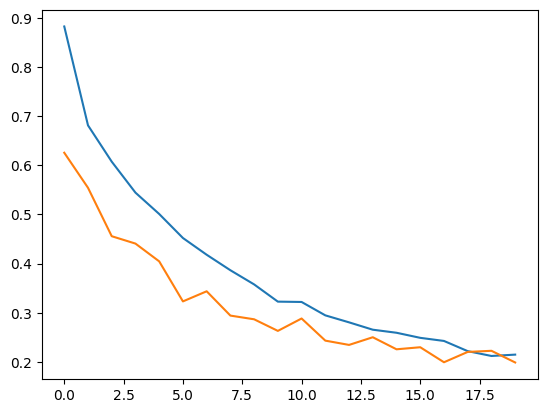

In [8]:
#Evaluating the performance
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

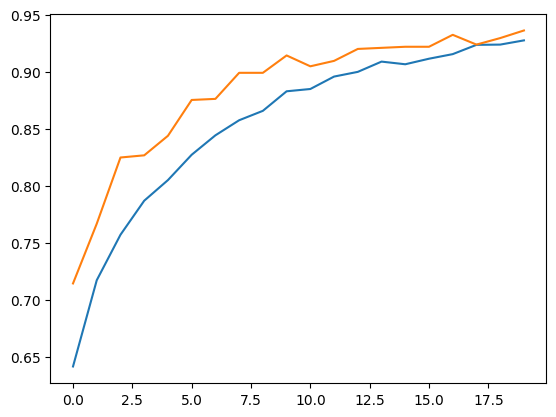

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [10]:
accc = model.evaluate(test_data,test_target)
print(accc)

33/33 [==============================] - 5s 138ms/step - loss: 0.1990 - accuracy: 0.9363
[0.19898925721645355, 0.936251163482666]


In [11]:
#Saving the model and weights for future use
model.save_weights(f'./model_AI_Car_Weights.h5')

In [12]:
model.save("./model_AI_Car.h5",save_format="h5")

c:\Users\Anjan GJ\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
